In [0]:
#https://arxiv.org/pdf/physics/9705023.pdf, igaz 1997 :\

In [0]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr

from autograd.core import primitive

from matplotlib import pyplot as plt
%matplotlib inline


In [0]:
nx = 10
dx = 1. / nx

In [0]:
#dpsy/dx = psy egyenletet szeretnénk megoldani:

In [0]:
def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return psy

def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return np.exp(x)

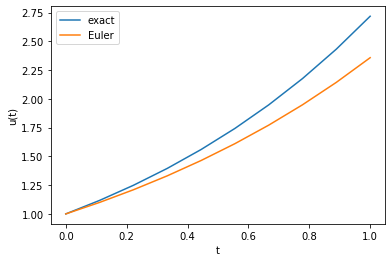

In [0]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)
psy_fd = np.zeros_like(y_space)
psy_fd[0] = 1. # IC

for i in range(1, len(x_space)):
    psy_fd[i] = psy_fd[i-1] + psy_fd[i-1] * dx
  
plt.figure()
plt.plot(x_space, y_space,label='exact') 
plt.plot(x_space, psy_fd,label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.show()

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 1. + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [0]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

0.13018759044532546
[array([[ 2.67871848, -2.12560615, -0.67379039,  0.04234096, -1.54374264,
        -0.31625876,  0.70140742,  1.13246895,  0.07237049, -0.16456663]]), array([[-0.49719111],
       [-1.81080571],
       [-1.70450329],
       [ 2.20048251],
       [ 0.3735514 ],
       [ 0.62877394],
       [ 0.92352372],
       [ 0.41431381],
       [ 0.0708565 ],
       [ 1.07334307]])]


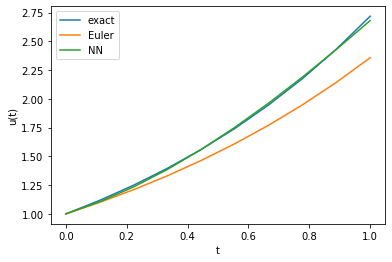

In [0]:
print(loss_function(W, x_space))
res = [1 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

print(W)

plt.figure()
plt.plot(x_space, y_space,label='exact') 
plt.plot(x_space, psy_fd,label='Euler')
plt.plot(x_space, res,label='NN')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.show()

In [0]:
#dpsy/dx=psy(1-psy) egyenletet szeretnénk megoldani:

In [0]:
nx = 10.
dx = 1. / nx

In [0]:
def f(x, psy):
    '''
        d(psy)/dx = f(x, psy)
        This is f() function on the right
    '''
    return psy*(1-psy)

def psy_analytic(x):
    '''
        Analytical solution of current problem
    '''
    return (np.exp(x)/(99+np.exp(x)))

In [0]:
psy_analytic(0)

0.01

In [0]:
x_space = np.linspace(0, 1, nx)    
y_space = psy_analytic(x_space)

In [0]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))


def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])


def d_neural_network_dx(W, x, k=1):
    return np.dot(np.dot(W[1].T, W[0].T**k), sigmoid_grad(x))


def loss_function(W, x):
    loss_sum = 0.
    for xi in x:
        net_out = neural_network(W, xi)[0][0]
        psy_t = 0.01 + xi * net_out
        d_net_out = d_neural_network_dx(W, xi)[0][0]
        d_psy_t = net_out + xi * d_net_out
        func = f(xi, psy_t)       
        err_sqr = (d_psy_t - func)**2

        loss_sum += err_sqr
    return loss_sum

In [0]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

# x = np.array(1)
# print neural_network(W, x)
# print d_neural_network_dx(W, x)

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)
    
#     print loss_grad[0].shape, W[0].shape
#     print loss_grad[1].shape, W[1].shape
    
    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]
    
#     print loss_function(W, x_space)

0.0064894470633448005
[array([[-0.73995191, -0.22134492, -0.06610538,  0.45122612,  1.25288995,
         0.90601382, -0.22562101, -0.56858089,  0.3585137 ,  1.3257636 ]]), array([[ 0.4155529 ],
       [-0.95642552],
       [ 0.88036392],
       [ 0.1768174 ],
       [ 0.19276505],
       [-0.62133429],
       [ 0.39169127],
       [-0.80773383],
       [ 0.11629414],
       [ 0.15341619]])]


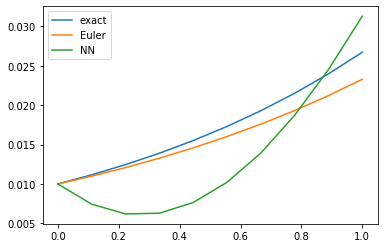

In [0]:
print(loss_function(W, x_space))
res = [0.01 + xi * neural_network(W, xi)[0][0] for xi in x_space] 

print(W)

plt.figure()
plt.plot(x_space, y_space,label='exact') 
plt.plot(x_space, psy_fd,label='Euler')
plt.plot(x_space, res,label='NN')
plt.legend()
plt.show()

In [0]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def neural_network(W, x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def neural_network_x(x):
    a1 = sigmoid(np.dot(x, W[0]))
    return np.dot(a1, W[1])

def psy_trial(xi, net_out):
    return 0.01 + xi * net_out

psy_grad = grad(psy_trial)

def loss_function(W, x):
    loss_sum = 0.
    
    for xi in x:
        net_out = neural_network(W, xi)[0][0]

        net_out_d = grad(neural_network_x)(xi)
                
        psy_t = psy_trial(xi, net_out)
        
        gradient_of_trial = psy_grad(xi, net_out)
                
        func = f(xi, psy_t) # right part function
        
        err_sqr = (gradient_of_trial - func)**2
        loss_sum += err_sqr
        
    return loss_sum

In [0]:
W = [npr.randn(1, 10), npr.randn(10, 1)]
lmb = 0.001

for i in range(1000):
    loss_grad =  grad(loss_function)(W, x_space)

    W[0] = W[0] - lmb * loss_grad[0]
    W[1] = W[1] - lmb * loss_grad[1]

0.0010086030741891395


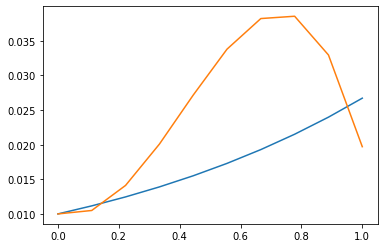

In [0]:
print(loss_function(W, x_space))
res = [psy_trial(xi, neural_network(W, xi)[0][0]) for xi in x_space] 


plt.figure()
plt.plot(x_space, y_space) 
plt.plot(x_space, res)
plt.show()